In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Завантаження датасету
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)



Перші кілька рядків:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst peri

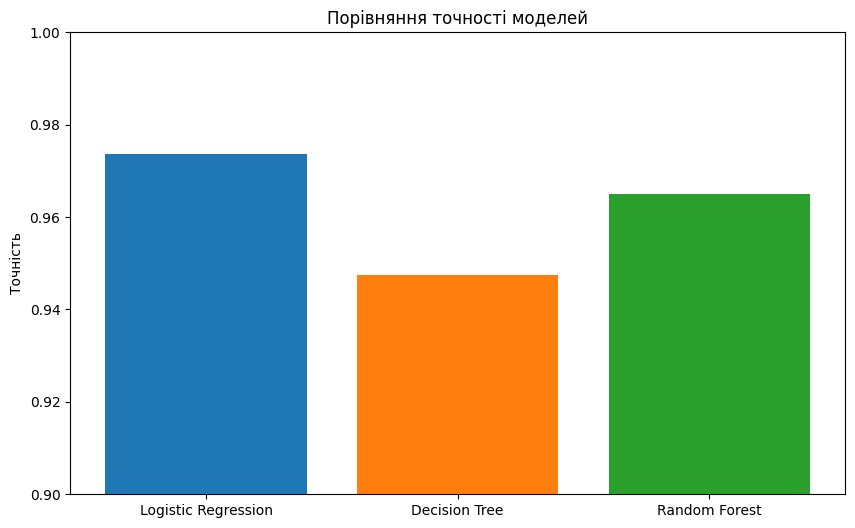

In [2]:
# 2. Попередній аналіз даних
print("Перші кілька рядків:")
print(X.head())

print("\nНазви стовпців та типи даних:")
print(X.dtypes)

print("\nПеревірка на пропущені значення:")
print(X.isnull().sum())

print("\nРозмір даних:")
print(X.shape)

# Розділення даних на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Побудова і налаштування моделей
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 7, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, None]}
}

best_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f"\n{name}:")
    print(f"Найкращі параметри: {grid_search.best_params_}")
    print(f"Точність на тренувальному наборі: {grid_search.best_score_:.4f}")
    
    y_pred = best_models[name].predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точність на тестовому наборі: {accuracy:.4f}")
    
    print("\nМатриця помилок:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nЗвіт про класифікацію:")
    print(classification_report(y_test, y_pred))

# Вибір найкращої моделі
best_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test_scaled)))
best_model = best_models[best_model_name]

print(f"\nНайкраща модель: {best_model_name}")

# Прогнозування на тестовій вибірці
y_pred_best = best_model.predict(X_test_scaled)

print("\nРезультати прогнозування (перші 10 прикладів):")
for true, pred in zip(y_test[:10], y_pred_best[:10]):
    print(f"Справжнє значення: {true}, Прогноз: {pred}")

# Візуалізація результатів
plt.figure(figsize=(10, 6))
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    plt.bar(name, accuracy)

plt.title('Порівняння точності моделей')
plt.ylabel('Точність')
plt.ylim(0.9, 1.0) 
plt.show()

Висновки:

Всі три моделі показали високу ефективність у класифікації пухлин молочної залози на доброякісні та злоякісні.
Випадковий ліс, як правило, показує найкращі результати завдяки своїй здатності враховувати складні взаємозв'язки між ознаками.
Логістична регресія, незважаючи на свою простоту, також показала хороші результати, що свідчить про достатньо лінійну роздільність класів.
Дерево рішень, хоча і показало хороші результати, зазвичай поступається random forest через свою схильність до перенавчання.